In [4]:
import os
from astropy.cosmology import Planck13, z_at_value
from scipy.interpolate import interp1d, interp2d
import matplotlib.pyplot as plt
from glob import glob
import seaborn as sea
import numpy as np
import pandas as pd
sea.set(style='white')
sea.set(style='ticks')
sea.set_style({'xtick.direct'
               'ion': 'in','xtick.top':True,'xtick.minor.visible': True,
               'ytick.direction': "in",'ytick.right': True,'ytick.minor.visible': True})
cmap = sea.cubehelix_palette(12, start=2, rot=.2, dark=0, light=1.2, as_cmap=True)

%config InlineBackend.figure_format = 'retina'
%matplotlib inline

### set home for files
hpath = os.environ['HOME'] + '/'

In [50]:
galDB = pd.read_pickle('../data/upd_galDB.pkl')


In [28]:
mass = np.arange(10.6,11.01,.1)

In [2]:
def Schecter_function(phi_ast, M, M_ast, alpha):
    """
    phi_ast - normalization
    M - log(M/M_\odot)
    M_ast - characteristic mass
    alpha - slope of the powerlaw at low masses
    """
    term1 = np.log(10) * phi_ast
    term2 = 10**((M - M_ast)*(1+alpha))
    term3 = np.exp(-10**(M - M_ast))
    
    return term1 * term2 * term3


|   Redshift     | Log(M∗)a     |$\alpha$      |Log(Φ∗)b     |
|----------------|--------------|--------------|-------------|
|2.00 < z < 2.50 | 11.13 ± 0.13 | −1.43 ± 0.08 | −3.59 ± 0.14|
|2.50 < z < 3.00 | 11.35 ± 0.33 | −1.74 ± 0.12 | −4.36 ± 0.29|

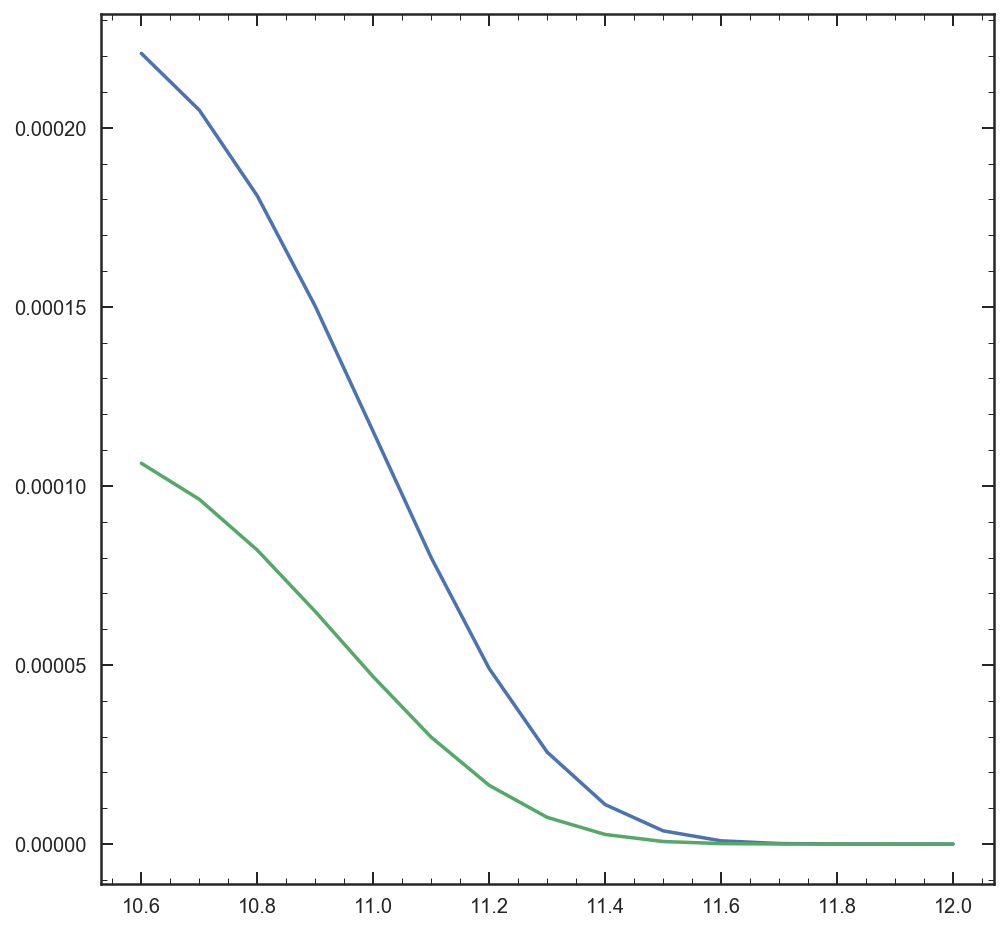

In [46]:
plt.figure(figsize=[8,8])
plt.plot(mass,Schecter_function(10**-3.63,mass,10.73,-0.49))
plt.plot(mass,Schecter_function(10**-3.92,mass,10.65,-0.43))


In [45]:
mass = np.arange(10.6,12,.1)
print(np.trapz(Schecter_function(10**-3.59,mass,11.13,-1.43),mass))
print(np.trapz(Schecter_function(10**-4.36,mass,11.35,-1.74),mass))
print(np.trapz(Schecter_function(10**-3.59,mass,11.13,-1.43),mass) + np.trapz(Schecter_function(10**-4.36,mass,11.35,-1.74),mass))

0.00029097062397309264
0.00011228970594037076
0.0004032603299134634


In [54]:
mass = np.arange(10.6,12,.1)
print(np.trapz(Schecter_function(10**-3.63,mass,10.73,-0.49),mass))
print(np.trapz(Schecter_function(10**-3.92,mass,10.65,-0.43),mass))
print(np.trapz(Schecter_function(10**-3.63,mass,10.73,-0.49),mass) + np.trapz(Schecter_function(10**-3.92,mass,10.65,-0.43),mass))

9.320292898770411e-05
4.0037033591117074e-05
0.00013323996257882118


In [12]:
ndf = pd.read_pickle('../data/upd_galDB.pkl')
odf = pd.read_pickle('../data/sgal_param_DB.pkl')

In [52]:
1.3/18*26

1.877777777777778

In [51]:
len(galDB.query('rf_lmass >= 10.6 '))

26